In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import keras

batch_size = 32

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Dataset/hand',
    image_size=(224, 224),
    batch_size=batch_size,
    validation_split=0.3,
    subset='both',
    seed=3407
)

Found 4000 files belonging to 4 classes.
Using 2800 files for training.
Using 1200 files for validation.


In [4]:
from keras import Model
from keras.applications.resnet50 import ResNet50
from typing import cast

num_classes = 4
base_model = ResNet50(include_top=False, weights=None, pooling='avg', input_shape=(224, 224, 3)) # type: ignore
base_model = cast(Model, base_model)

outputs = base_model.layers[-2].output
outputs = keras.layers.Flatten(name='flatten')(outputs)
outputs = keras.layers.Dense(512, name='fc1', activation='relu')(outputs)
outputs = keras.layers.Dense(256, name='fc2', activation='relu')(outputs)
outputs = keras.layers.Dense(num_classes, name='softmax', activation='softmax')(outputs)

model = Model(inputs=base_model.input, outputs=outputs, name=base_model.name)
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 75,100,804 (286.49 MB)

 Trainable params: 75,047,684 (286.28 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# bộ dữ liệu dataset
from tensorflow.keras.callbacks import ModelCheckpoint

# Cài đặt callback để lưu mô hình tốt nhất
checkpoint = ModelCheckpoint('best.keras',  # Lưu mô hình tốt nhất
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

# Compile mô hình
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=20,
                    callbacks=[checkpoint])

# Đánh giá trên tập huấn luyện
loss, accuracy = model.evaluate(val_ds)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Lưu mô hình cuối cùng
model.save('last.keras')


Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 26s/step - accuracy: 0.3156 - loss: 23.0852 
Epoch 1: val_accuracy improved from -inf to 0.43667, saving model to best.keras
88/88 ━━━━━━━━━━━━━━━━━━━━ 2670s 30s/step - accuracy: 0.3159 - loss: 22.9602 - val_accuracy: 0.4367 - val_loss: 11516.4463
Epoch 2/20
45/88 ━━━━━━━━━━━━━━━━━━━━ 19:23 27s/step - accuracy: 0.6301 - loss: 2.0027

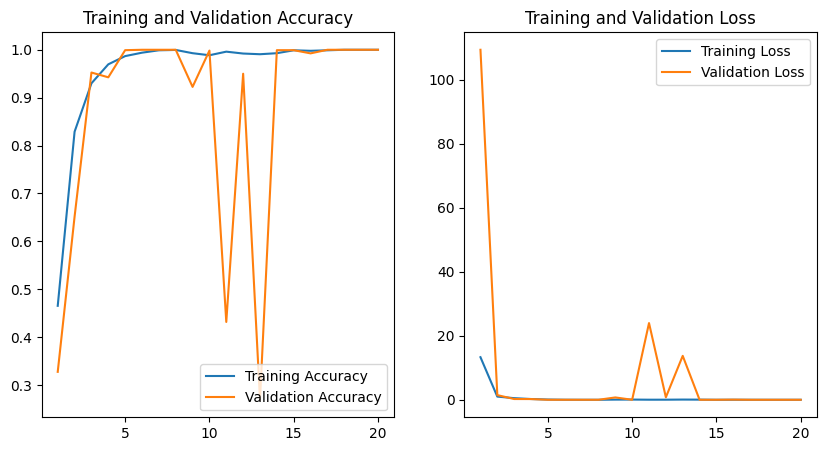

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss,label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('output.svg')
plt.show()

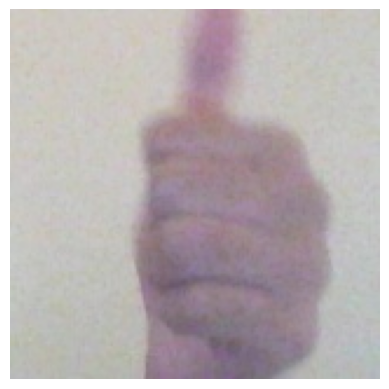

1735316961.6763191
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1735316966.0211475
Class 0: 0.0000
Class 1: 0.0004
Class 2: 0.0000
Class 3: 0.9996
Predicted class: 3
Inference time: 4.3448 ms


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

# Tải mô hình tốt nhất
model = load_model('best.keras')

img_path = '/content/drive/MyDrive/hand/1/10.jpg'
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # Tắt hiển thị trục
plt.show()


# Tải và chuẩn bị ảnh
start_time = time.time()
print(start_time)
img = image.load_img(img_path, target_size=(224, 224))  # Resize ảnh về kích thước 224x224
img_array = image.img_to_array(img)  # Chuyển ảnh sang mảng numpy
img_array = np.expand_dims(img_array, axis=0)  # Thêm chiều batch
img_array = img_array / 255.0  # Chuẩn hóa giá trị pixel
# Thực hiện suy luận
predictions = model.predict(img_array)
end_time = time.time()
print(end_time)
predicted_class = np.argmax(predictions, axis=1)  # Lấy lớp dự đoán

# Kết thúc đo thời gian
inference_time = end_time - start_time

# In kết quả
for i, prob in enumerate(predictions[0]):
    print(f"Class {i}: {prob:.4f}")

print(f"Predicted class: {predicted_class[0]}")
print(f"Inference time: {inference_time:.4f} ms")